# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [175]:
from citipy import citipy
import numpy as np
import requests
from api_keys import weather_api_key
from pprint import pprint
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats

## Generate Cities List

In [30]:
 
# generate a set of random lat and lng combinations  Attached documentation :- https://gisgeography.com/latitude-longitude-coordinates/
# The high and low range for lats varies from -90 to 90. The high and low range for longs varies from --180 to 180. 

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Create a list of co-ordinates that represent random geocodes
coordinates = zip(lats, lngs)
 

cities = []

#get the nearest city using citypy 
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city = citipy.nearest_city(lat, lon)
    
    #check if the nearest city is already in list, if not add it to the list
    if city not in cities:
        cities.append(city)

print(len(cities))

622


In [56]:
   #make the call to weather api and convert the response to json        
response = requests.get(query_url +  "Houston").json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1600362472,
 'id': 4699066,
 'main': {'feels_like': 86.23,
          'humidity': 58,
          'pressure': 1014,
          'temp': 86.04,
          'temp_max': 87.8,
          'temp_min': 84},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4404,
         'sunrise': 1600344448,
         'sunset': 1600388650,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 12.75}}
1600362472


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# initialize panda series for capturing values for 
# Temperature (F) vs. Latitude, Humidity (%) vs. Latitude, Cloudiness (%) vs. Latitude ,Wind Speed (mph) vs. Latitude and build a data frame with following values
# City       Lat       Lng      Max Temp       Humidity      Cloudiness      Wind Speed       Country      Date

citiesSelected = []
maxTemps = []
humidities = []
cloudinessList = []
windSpeeds = []
latitudes = []
longitudes = []
countries = []
dates = []

 
# initialize counter variables
recordCount = 1
setCount = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities retrieved from citypy 
for city in cities:
 
    try:
        
        # add the log statement 
        print(f"Processing Record {recordCount} of Set {setCount} | {city.city_name}")
            
                    
        #make the call to weather api and convert the response to json        
        response = requests.get(query_url +  city.city_name).json()
        
        # retrieve the data from response and store them in variables. If the there is exception skip adding the entire result to the data frame
        try :
            citySelected = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            temp = response["main"]["temp_max"]
            humid = response["main"]["humidity"]
            cloudiness = response["clouds"]["all"]
            wind = response["wind"]["speed"]
            country = response["sys"]["country"]
            date = response["dt"]
        except  :
            print(f"City not found. Skipping...") 
            continue
        
        
        #add the data variables to the corresponding lists
        
        citiesSelected.append(citySelected)        
        latitudes.append(lat)
        longitudes.append(lng)
        maxTemps.append(temp)
        humidities.append(humid)
        cloudinessList.append(cloudiness)
        windSpeeds.append(wind)
        countries.append(country)
        dates.append(date)      
        
        # check for the recordcount, if recordcount = 50 reinitialize recordCount to 1 and add 1 to setcount or else add 1 to recordCount
        if(recordCount == 50):
            recordCount = 1
            setCount += 1
        else :
            recordCount += 1
    
        
    except Exception as ex:
        print(f"City not found. Skipping...") 


# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | maghama
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | umm lajj
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | yumen
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | san isidro
Processing Record 13 of Set 1 | noumea
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | wattegama
Processing Record 16 of Set 1 | piskavica
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | hobart
Processing Record 20 of S

Processing Record 19 of Set 4 | okhotsk
Processing Record 20 of Set 4 | kashmor
Processing Record 21 of Set 4 | ca mau
Processing Record 22 of Set 4 | skjervoy
Processing Record 23 of Set 4 | cayenne
Processing Record 24 of Set 4 | khash
Processing Record 25 of Set 4 | kavieng
Processing Record 26 of Set 4 | tamparan
Processing Record 27 of Set 4 | bethel
Processing Record 28 of Set 4 | inta
Processing Record 29 of Set 4 | sitka
Processing Record 30 of Set 4 | salalah
Processing Record 31 of Set 4 | chiredzi
Processing Record 32 of Set 4 | sur
Processing Record 33 of Set 4 | amapa
Processing Record 34 of Set 4 | cherskiy
Processing Record 35 of Set 4 | guerrero negro
Processing Record 36 of Set 4 | pemangkat
Processing Record 37 of Set 4 | iwanai
Processing Record 38 of Set 4 | novobirilyussy
Processing Record 39 of Set 4 | kashan
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | plettenberg bay
Processing Record 42 of Set 4 | comodoro rivadavia
Processing Record

Processing Record 43 of Set 7 | coihaique
Processing Record 44 of Set 7 | pervomayskoye
Processing Record 45 of Set 7 | duluth
Processing Record 46 of Set 7 | clyde river
Processing Record 47 of Set 7 | kiama
Processing Record 48 of Set 7 | pimenta bueno
Processing Record 49 of Set 7 | peto
Processing Record 50 of Set 7 | ust-koksa
Processing Record 1 of Set 8 | kaset sombun
Processing Record 2 of Set 8 | haimen
Processing Record 3 of Set 8 | keti bandar
Processing Record 4 of Set 8 | geraldton
Processing Record 5 of Set 8 | shebunino
Processing Record 6 of Set 8 | bundaberg
Processing Record 7 of Set 8 | birjand
Processing Record 8 of Set 8 | vila velha
Processing Record 9 of Set 8 | mikun
Processing Record 10 of Set 8 | himora
City not found. Skipping...
Processing Record 10 of Set 8 | rockhampton
Processing Record 11 of Set 8 | kaeo
Processing Record 12 of Set 8 | lakhnadon
Processing Record 13 of Set 8 | cozumel
Processing Record 14 of Set 8 | bac lieu
Processing Record 15 of Set 8

Processing Record 22 of Set 11 | sharan
Processing Record 23 of Set 11 | mpika
Processing Record 24 of Set 11 | tiruchchendur
Processing Record 25 of Set 11 | hammerfest
Processing Record 26 of Set 11 | coquimbo
Processing Record 27 of Set 11 | waipawa
Processing Record 28 of Set 11 | lluta
Processing Record 29 of Set 11 | turmalina
Processing Record 30 of Set 11 | zeya
Processing Record 31 of Set 11 | santa eulalia del rio
City not found. Skipping...
Processing Record 31 of Set 11 | magway
Processing Record 32 of Set 11 | bokovskaya
Processing Record 33 of Set 11 | socorro
Processing Record 34 of Set 11 | santarem
Processing Record 35 of Set 11 | alekseyevsk
Processing Record 36 of Set 11 | samarai
Processing Record 37 of Set 11 | soe
Processing Record 38 of Set 11 | mossendjo
Processing Record 39 of Set 11 | malinovskiy
Processing Record 40 of Set 11 | cabedelo
Processing Record 41 of Set 11 | phan thiet
Processing Record 42 of Set 11 | richards bay
Processing Record 43 of Set 11 | j

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
# create a dictionary frame from cities, lat, and temp
weather_dict = {'City' : citiesSelected,
                'Lat' : latitudes,
                'Lng' : longitudes,
                'Max Temp' : maxTemps,
                'Humidity' : humidities,
                'Cloudiness' : cloudinessList,
                'Wind Speed' : windSpeeds,
                'Country' : countries,
                'Date' : dates
                }

# build the data frame
cityWeatherDF = pd.DataFrame(weather_dict)

# export to csv 
output_path = os.path.join("Resources", "cities.csv")
cityWeatherDF.to_csv(output_path,  index=False)

# display the data frame
cityWeatherDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,77.52,77,40,22.37,PF,1600357383
1,Punta Arenas,-53.15,-70.92,41.00,73,40,38.03,CL,1600357183
2,Klaksvík,62.23,-6.59,53.60,100,90,6.93,FO,1600357385
3,Ushuaia,-54.80,-68.30,35.60,64,75,38.03,AR,1600357261
4,Lorengau,-2.02,147.27,81.23,81,95,9.71,PG,1600357386
...,...,...,...,...,...,...,...,...,...
568,Preobrazheniye,42.90,133.91,59.29,91,94,1.77,RU,1600357605
569,Albanel,48.88,-72.45,44.60,48,20,13.87,CA,1600357606
570,Mendoza,-32.89,-68.83,73.40,20,0,5.82,AR,1600357606
571,Sant Pere de Ribes,41.27,1.77,82.00,75,96,5.99,ES,1600357606


In [134]:
# get the statistical values for the columns - count, mean,  std,  min, 25%, 50%, 75%,max

df = pd.DataFrame(cityWeatherDF[['Lat', 'Lng',  'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Date']])

# calculate the statistical analysis on the columns
countArray = df.count() 
meanArray = df.mean()
minArray = df.min()
maxArray = df.max()
stdevArray = df.std()

# get quantile values 
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)

# build the dataFrame and transpose the dataframe
statDataFrame  = pd.DataFrame ({'count' : countArray ,
                                'mean'  : meanArray,
                                'std' : stdevArray,
                                'min' : minArray,
                                '25%' : Q1,
                                '50%' : Q2,
                                '75%' : Q3,
                                'max' : maxArray
                               }).transpose()
#display the dataframe
statDataFrame
 


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.910366,19.778953,67.794468,67.931937,50.574171,8.188150,1.600357e+09
std,32.416805,91.507202,16.553073,22.521410,38.320285,5.582567,1.489409e+02
min,-54.800000,-179.170000,20.390000,3.000000,0.000000,0.360000,1.600357e+09
25%,-4.670000,-66.380000,54.000000,57.000000,7.000000,4.070000,1.600357e+09
50%,26.100000,28.940000,70.000000,72.000000,51.000000,6.930000,1.600357e+09
75%,47.260000,100.350000,81.000000,85.000000,90.000000,10.740000,1.600358e+09
max,78.220000,179.320000,112.780000,100.000000,100.000000,38.030000,1.600358e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [144]:
# get the index of cities with humidity > 100. 
idx = cityWeatherDF.index[cityWeatherDF['Humidity']> 100]

# check the count of the index
len(idx)


0

In [167]:
#  Get the indices of cities that have humidity over 100%.
idx 

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#not required since there is now city with humidity >100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

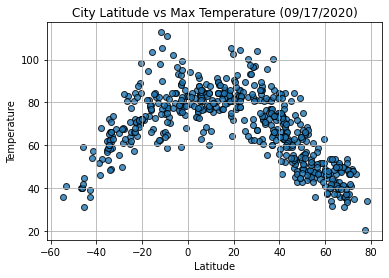

In [160]:
# Create a Scatter Plot for temperature vs latitude

# plot  the latitudes as X axis, Temprature on Y Axis
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Max Temp']
plt.scatter(x_values,y_values, alpha=0.8,marker="o", edgecolor="black")

# set the labels for x axis, y axis and title for the graph
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Max Temperature (09/17/2020)')

#display the grid value in the graph and show the graph
plt.grid()

# Save the plotted figures as .pngs
output_path = os.path.join("Resources", "Fig1 Latitude Vs Temperature.png")
plt.savefig(output_path)

#show the graph
plt.show()


## Latitude vs. Humidity Plot

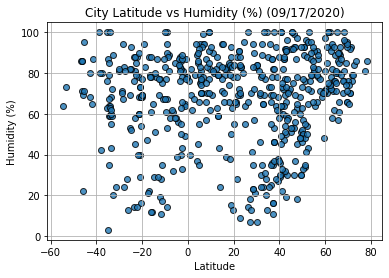

In [163]:
# Create a Scatter Plot for humidity vs latitude

# plot  the latitudes as X axis, humidity on Y Axis
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Humidity']
plt.scatter(x_values,y_values, alpha=0.8,marker="o", edgecolor="black")

# set the labels for x axis, y axis and title for the graph
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%) (09/17/2020)')

#display the grid value in the graph and show the graph
plt.grid()

# Save the plotted figures as .pngs
output_path = os.path.join("Resources", "Fig2 Latitude Vs Humidity.png")
plt.savefig(output_path)

#show the graph
plt.show()


## Latitude vs. Cloudiness Plot

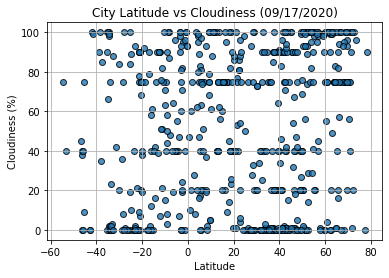

In [165]:
# Create a Scatter Plot for cloudiness vs latitude

# plot  the latitudes as X axis, humidity on Y Axis
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Cloudiness']
plt.scatter(x_values,y_values, alpha=0.8,marker="o", edgecolor="black")

# set the labels for x axis, y axis and title for the graph
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (09/17/2020)')

#display the grid value in the graph and show the graph
plt.grid()

# Save the plotted figures as .pngs
output_path = os.path.join("Resources", "Fig3 Latitude Vs Cloudiness.png")
plt.savefig(output_path)

#show the graph
plt.show()


## Latitude vs. Wind Speed Plot

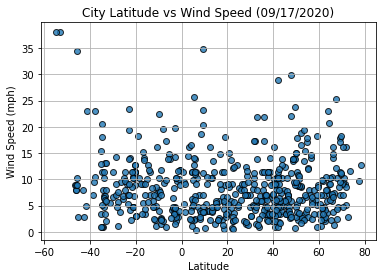

In [166]:
# Create a Scatter Plot for wind speed vs latitude

# plot  the latitudes as X axis, humidity on Y Axis
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Wind Speed']
plt.scatter(x_values,y_values, alpha=0.8,marker="o", edgecolor="black")

# set the labels for x axis, y axis and title for the graph
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (09/17/2020)')

#display the grid value in the graph and show the graph
plt.grid()

# Save the plotted figures as .pngs
output_path = os.path.join("Resources", "Fig4 Latitude Vs Wind Speed.png")
plt.savefig(output_path)

#show the graph
plt.show()


## Linear Regression

In [180]:
# create data frames for northern hemisphere and southern hemisphere.

northernHemisphereDF = cityWeatherDF[cityWeatherDF['Lat']>= 0]
southernHemisphereDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6706198133705116


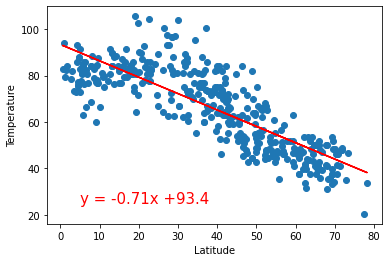

In [195]:

x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.text(5,25,line_eq, fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.537995594375909


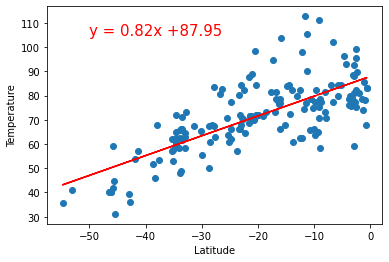

In [200]:

x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.text(-55,105,line_eq, fontsize=15,color="red")


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


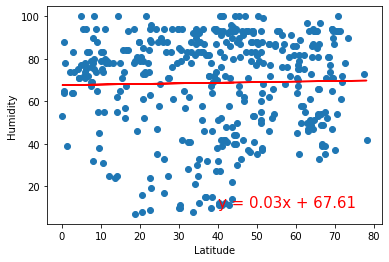

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


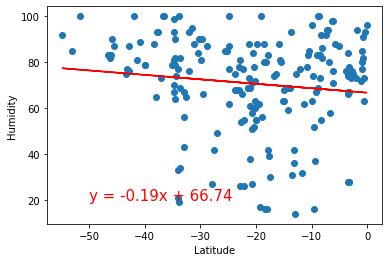

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


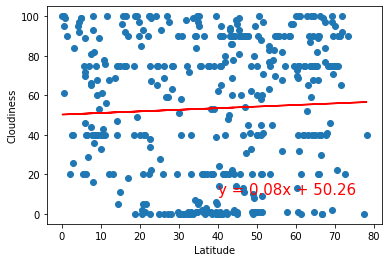

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


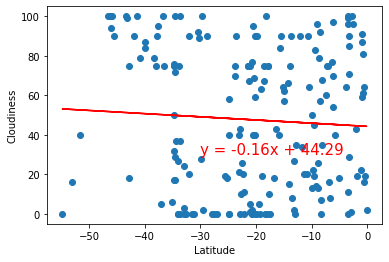

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


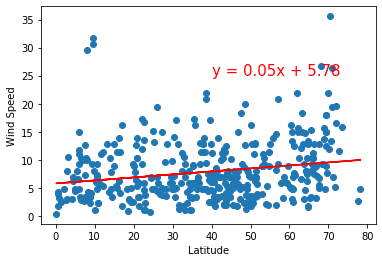

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


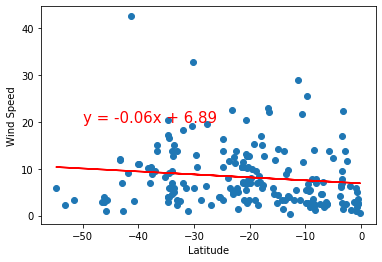